# Lab 3.2: Discrete Probability Distributions

## Outline

* Simulate and plot discrete distributions
* Calculate probabilities of events based on PMF and CDF
* Model / describe data using discrete distributions

## Simulate and Plot

### Example

Tom takes bus to school 5 days a week. The bus is on time 60% of the time, and the number of days it is on time varies from week to week.  

Let $X$ be the number of days that the bus is on time in a given week, we have $X \sim Binomial(5, 0.6)$.

To get an idea of how the "on-time days" vary, we could simulate the distribution of $X$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import binom

n = 5
p = 0.6

# Simulate 1000 values of X
sim = binom.rvs(n, p, size = 1000)
sim[0:10]

array([3, 2, 2, 1, 4, 4, 5, 2, 3, 4])

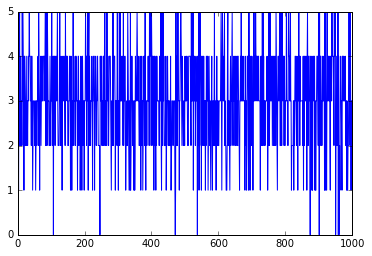

In [3]:
# Plot the simulations

plot(sim);

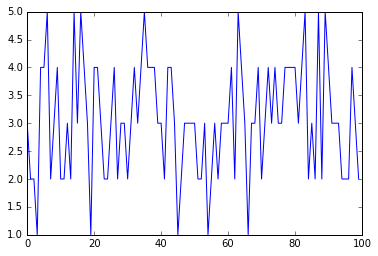

In [4]:
plot(sim[0:100]);

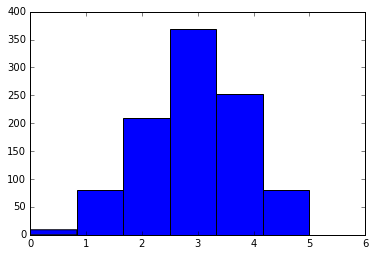

In [5]:
# Plot the distribution of the 1000 simulations of X

hist(sim, bins = 6);

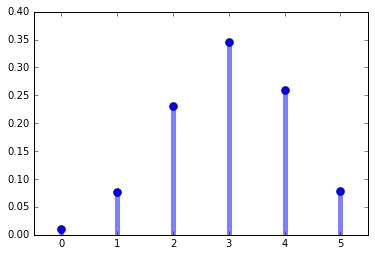

In [6]:
# Display the probability mass function of X

x = arange(0, 6)

plot(x, binom.pmf(x, n, p), 'bo', ms=8)
vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ylim(0, 0.4)
xlim(-0.5, 5.5);

## Calculate Probabilities of Events

In [7]:
# Calculate the probability that the bus is on time 5 days a week

p5 = binom.pmf(5, n, p)
p5

0.077759999999999996

In [8]:
# Calculate the probability that the bus is on time more than 3 days in a week
# Want P(X > 3), which is the same as (1 - P(X < or = 3))

1 - binom.cdf(3, n, p)

0.33695999999999993

## Data Modeling using Discrete Distributions

You are given a [CSV file](https://s3-us-west-2.amazonaws.com/dsci/6002/data/monthly_purchase_count.csv) containing the number of times 10,000 customers purchase from Company A in the span of a month. In order to understand the purchasing data better, you are asked to find a distribution that fits / describes the data.

- First import `numpy`, `scipy`, `pandas` and `matplotlib`

In [9]:
import pandas as pd

In [10]:
# see fit.py for details

from fit import fit_poisson, fit_negative_binomial

- Read in the CSV file with `pandas` 

In [11]:
monthly_purchases = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/monthly_purchase_count.csv')

In [12]:
monthly_purchases.describe()

,0
count,10000.000000
mean,19.724500
std,7.773985
min,1.000000
25%,14.000000
50%,19.000000
75%,24.000000
max,58.000000


- The first step is always to plot the data to get a general sense of the distribution
- We will be using this plot later again, so I am going to define a function here
- The `normed` argument converts the frequency counts to probabilities on the `y` axis

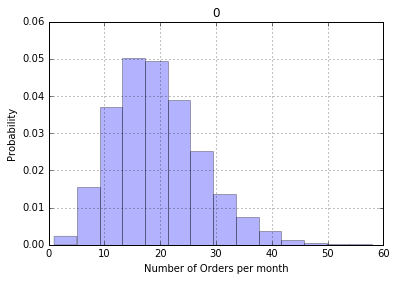

In [13]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
ylabel('Probability');
xlabel('Number of Orders per month');

- With count data, we often consider fitting the data with the **Poisson** or **Negative Binomial** distribution
- Let's take a look at the **Poisson** and **Negative Binomial** distributions

<img align="left" width="400px" src="images/pois.png">
<img align="left" src="images/neg_binom.png">

- Let's start with the **Poisson** distribution
- Based on the **image of Poisson above**, a $\lambda$ of around 15 would seem to be a good starting point


In [14]:
from scipy import stats

# Define a Poisson distribution with lambda = 15
poisson15 = stats.poisson(15.0)

# Define the x range of the data (0-60)
x = arange(60)

# Compute the PMF based on poisson with lambda of 15
poisson_y = poisson15.pmf(x)

- Let's plot the fitted distribution on top of the data

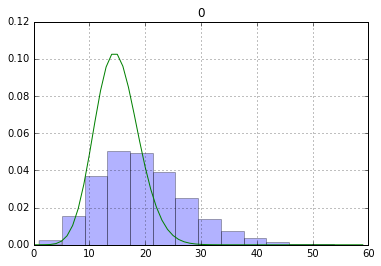

In [15]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
plot(x, poisson_y);

- It seems like we are a bit off target in terms of fit
- There are better ways to find $\lambda$ with the best fit
- We will cover that later in the course
- For now, you are provided with a `fit_poisson()` function

In [16]:
optimal_lambda = fit_poisson(monthly_purchases)
optimal_poisson = stats.poisson(optimal_lambda)
optimal_poisson_y = optimal_poisson.pmf(x)
optimal_lambda

19.724500004818786

- So we were not that far off with our initial guess, let's plot again

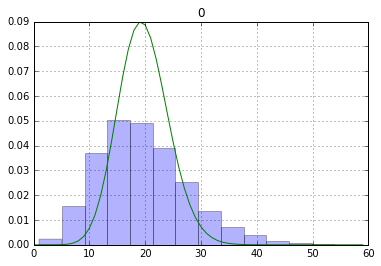

In [17]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
plt.plot(x, optimal_poisson_y);

The fit has improved, but it is still not a great fit.

In today's lab exercise, you will try to fit a Negative Binomial distribution to the data.

## Lab Exercises

1) Identifying Distributions

Often we have to identify what distribution we should use to model a real-life
situation. This exercise is designed to equip you with the ability to do so.

For each question:

- Name the most appropriate distribution and the associated parameter(s)

- Set up equation for the distribution, e.g.

  ```
  Let X be the number of heads in 30 coin flips:
  X ~ Binomial(n=30, p=0.5)
  ```

- Calculate the answer, e.g. ```P(X = 15) = 0.144``` or ```E(X) = 15```
  depending what the question is asking.

- Do it by hand first, then check your answers in Python.


1. A typist makes on average 2 mistakes per page.  
What is the probability of a particular page having no errors on it?

2. Components are packed in boxes of 20. The probability of a component being
   defective is 0.1.  
   What is the probability of a box containing 2 defective components?

3. You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller.  
If you wait on the sidewalk, how many people would you expect to have passed you by before you'd have a candidate to reach the jar?


2) Consider a loaded die for which it is twice as likely to roll a '1' as the other numbers.  
1. If we roll the die 6 times, what is the probability that each number shows up exactly once (i.e. $P(X_1 = 1, X_2 = 1, \dots, X_6 = 1)$)?
2. Simulate the above experiments 100 times. (You might find the function [`numpy.random.multinomial`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multinomial.html) handy.)
3. Let $X_i$ be the number of times number $i$ shows up in the 6 rolls, plot the histograms of the values for $X_1$ and $X_2$ from the simulation results. (You should have 100 values for $X_1$ and 100 values for $X_2$ from the simulation.)
4. Estimate the mean and variance for $X_1$ and $X_2$ from the simulation results.
5. Calculate the theoretical mean and variance for $X_1$ and $X_2$. Compare them to your estimates above.

3) We saw in the **Data Modeling using Discrete Distributions** section of the lab that the Poisson distribution did not fit the data very well. In this part of the lab exercise, we will try to fit a Negative Binomial model instead. In general, Negative Binomial has more flexiblility in terms of fitting data since it takes 2 parameters. You can use the `fit_negative_binomial` function in the `fit.py` module to estimate the parameters of the Negative Binomial distribution based on the data. (You might want to read through the code for the function to understand how to use it. You do not need to completely understand the estimation method used by the function yet - it uses the Method of Moments (MOM) which we will cover later in the course.)

**Note**: [`SciPy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html) defines the Negative Binomial distribution slightly differently - instead of the total number of trials, $X$ is defined as the number of failures before the nth success.
1. Fit a Negative Binomial distribution to the data.
2. Plot the distribution fitted on top of the histogram of the data.
3. Comment on the model fit.